<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_experiment_4(conv_depth).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder (CAE) — Experiment #4: Convolutional Depth

This notebook explores the impact of increasing the depth of the convolutional encoder-decoder architecture on reconstruction quality and training behavior when applied to MNIST digit images.

---

## 📌 Objective

To evaluate how adding more convolutional layers affects the model's ability to learn compact representations and reconstruct digit images. The goal is to assess whether deeper architectures offer meaningful improvements compared to the baseline CAE.

---

## 🔁 Experiment Workflow

1. Clone the project and configure dependencies  
2. Define multiple CAE variants with different convolutional depths  
3. Train each variant over 20 epochs using the Adam optimizer  
4. Analyze training and validation losses, and compare reconstruction quality with the baseline model  
5. Draw conclusions  
6. Export results to GitHub

---

## 📊 Key Findings

- Additional convolutional layers provide slight improvements in reconstruction quality  
- Deeper models show smoother loss curves and marginally better generalization  
- The performance gains do not justify the added complexity on a simple dataset like MNIST  
- The baseline remains an efficient and well-balanced choice

---

## 1. 🔧 Setup

This section prepares the environment for running the experiment.

- Clone the GitHub repository  
- Import model classes and utility functions from `src/`  
- Import necessary libraries  
- Define constants

---

## 2. 🧠 Define Experiment Models

This section defines two alternative CAE architectures to evaluate the effect of increased convolutional depth.

- `experiment_4_model_1`: 2-layer encoder and decoder (Baseline depth)  
- `experiment_4_model_2`: 3-layer encoder and decoder (Deeper model)

All other hyperparameters remain consistent with the baseline model, including:

- Filters: `[32, 32, 64]`
- Latent dimension: `32`
- Batch sizes: 32 (train) / 500 (validation)
- Activation: ReLU  
- Optimizer: Adam (`lr = 1e-3`)  
- Scheduler: `ReduceLROnPlateau`  
- Epochs: 20  

---

## 3. 🏋️‍♀️ Train Experiment Models

Each model variant is trained using the same `run_model_training()` function to ensure consistency.

For each configuration:
- A model is initialized with its respective number of encoder/decoder layers  
- The optimizer (`Adam`) and scheduler (`ReduceLROnPlateau`) are redefined  
- Training proceeds for 20 epochs with the same data loaders as the baseline  
- Training and validation losses are logged  
- Each model and its corresponding loss history are saved for analysis

This controlled setup isolates the effect of architectural depth.

---

## 4. 🔍 Results and Observations

This section presents the effect of convolutional depth on model learning and output quality.

### 4.1 📉 Loss Curves

Increasing convolutional depth slightly reduces reconstruction loss and improves training smoothness, but offers only modest benefits on MNIST.

- Both models converged within the first 10 epochs, confirming that 20 training epochs is sufficient  
- The **deeper model** (3-layer encoder/decoder) showed **slightly lower final loss** than the baseline  
- **Loss curves were smoother** in the deeper model, indicating more stable training  
- The gain in performance is minor and may not justify the added complexity for this dataset

---


In [ ]:
display(Image(filename="CAE-MNIST/outputs/experiment_1_files/experiment_4_image_loss.png"))

### 4.2 🧪 Visual Benchmarks

Absolutely indestinsguishable!

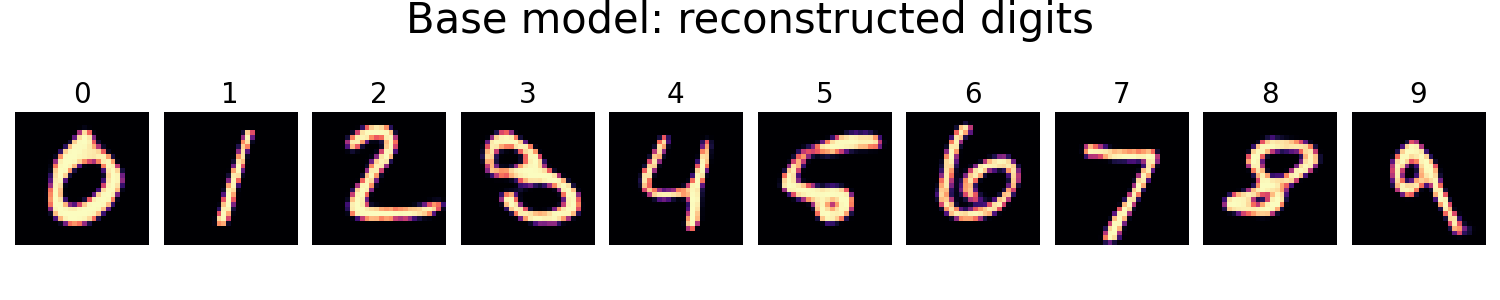

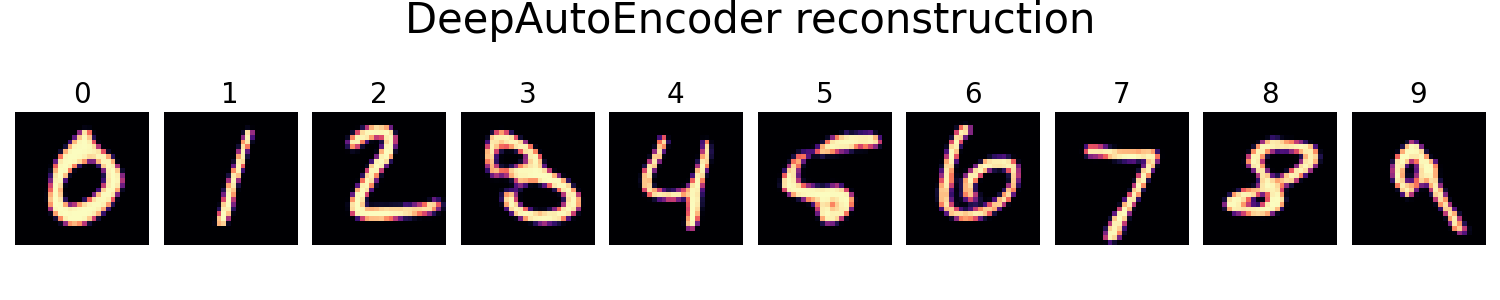

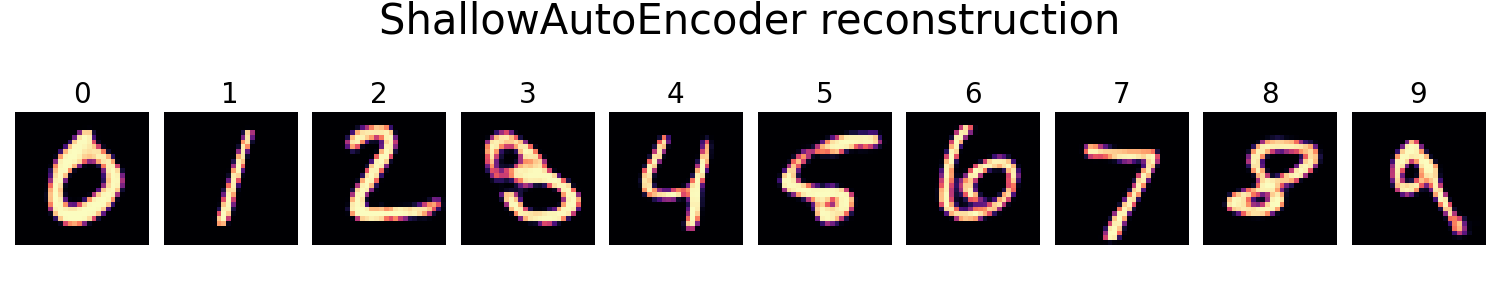

In [68]:
disply_reconstruction_images(4, 2)

## 5. ✅ Conclusion

This experiment confirms that increasing convolutional depth beyond two layers offers only minimal benefit for MNIST digit reconstruction. Although the deeper model demonstrated slightly smoother and lower loss curves, both architectures ultimately converged at similar epochs and achieved comparable reconstruction quality.

The use of more than two convolutional blocks is therefore unnecessary for such a simple task. It adds computational overhead without delivering proportional gains. The 2-layer configuration — shared by the baseline — remains the most efficient and effective choice, offering sufficient model capacity without redundancy.


## 1. 🔧 Setup

In [1]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 607 (delta 86), reused 40 (delta 24), pack-reused 467 (from 1)
Receiving objects: 100% (607/607), 17.72 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [67]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_digits_row, plot_experiment_reconstructions, plot_experiment_history, disply_reconstruction_images

# import exporting functions
from src.export import save_experiment_files, export_experiment_files

In [56]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

# Import utility to display images directly in notebook
from IPython.display import Image, display

In [4]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

## 2. 🧠 Define Experiment Models



In [5]:
# Load base model description
base_model_files_path = '/content/CAE-MNIST/outputs/base_model_files'
with open(os.path.join(base_model_files_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

# print baseline model description
print(base_description)

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500


In [6]:
# define base parameters from the description
base_latent_dim=32
base_train_batch_size=32
base_validation_batch_size=500
base_num_epoch=20

# load training and validation dataloaders with base batch sizes
base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.92MB/s]


In [32]:
class DeepEncoder(Encoder):
    def _build_layers(self):
        # 4-layer encoder architecture
        self.encn1 = nn.Conv2d(1, self.n_channels[0], self.kernel[0], self.stride, self.padding)
        self.encn2 = nn.Conv2d(self.n_channels[0], self.n_channels[1], self.kernel[1], self.stride, self.padding)
        self.encn3 = nn.Conv2d(self.n_channels[1], self.n_channels[2], self.kernel[2], self.stride, self.padding)
        self.encn4 = nn.Conv2d(self.n_channels[2], self.n_channels[3], self.kernel[3], self.stride, self.padding)

        # optional batch normalization
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(self.n_channels[0])
            self.bn2 = nn.BatchNorm2d(self.n_channels[1])
            self.bn3 = nn.BatchNorm2d(self.n_channels[2])
            self.bn4 = nn.BatchNorm2d(self.n_channels[3])
        else:
            self.bn1 = self.bn2 = self.bn3 = self.bn4 = nn.Identity()

        # flatten and fully connected bottleneck layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(self.n_channels[3] * 2 * 2, self.latent_dim)  # output is 2x2 assuming 28x28 input

    def forward(self, input_x):
        x = self.apply_activation(self.bn1(self.encn1(input_x)))
        x = self.apply_activation(self.bn2(self.encn2(x)))
        x = self.apply_activation(self.bn3(self.encn3(x)))
        x = self.apply_activation(self.bn4(self.encn4(x)))
        return self.fc1(self.flatten(x))



class DeepDecoder(Decoder):
    def _build_layers(self):
        # fully connected + unflatten
        self.fc1 = nn.Linear(self.latent_dim, self.n_channels[3] * 2 * 2)
        self.unflatten = nn.Unflatten(1, (self.n_channels[3], 2, 2))

        # 4-layer decoder architecture
        self.decn1 = nn.ConvTranspose2d(self.n_channels[3], self.n_channels[2], self.kernel[3]+1, self.stride, self.padding)
        self.decn2 = nn.ConvTranspose2d(self.n_channels[2], self.n_channels[1], self.kernel[2], self.stride, self.padding)
        self.decn3 = nn.ConvTranspose2d(self.n_channels[1], self.n_channels[0], self.kernel[1], self.stride, self.padding)
        self.decn4 = nn.ConvTranspose2d(self.n_channels[0], 1, self.kernel[0], self.stride, self.padding)

        # optional batch normalization
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(self.n_channels[2])
            self.bn2 = nn.BatchNorm2d(self.n_channels[1])
            self.bn3 = nn.BatchNorm2d(self.n_channels[0])
        else:
            self.bn1 = self.bn2 = self.bn3 = nn.Identity()

    def forward(self, encoded):
        x = self.unflatten(self.fc1(encoded))
        x = self.apply_activation(self.bn1(self.decn1(x)))
        x = self.apply_activation(self.bn2(self.decn2(x)))
        x = self.apply_activation(self.bn3(self.decn3(x)))
        x = self.decn4(x)
        return torch.sigmoid(x)



class DeepAutoEncoder(nn.Module):
    def __init__(self, n_channels, latent_dim, use_batch_norm=False, activation_func='relu', leaky_relu_slope=0.2):
        super(DeepAutoEncoder, self).__init__()

        kernel = [4, 4, 3, 3]
        stride = 2
        padding = 1

        self.encoder = DeepEncoder(n_channels, latent_dim, kernel, stride, padding,
                                   use_batch_norm, activation_func, leaky_relu_slope)
        self.decoder = DeepDecoder(n_channels, latent_dim, kernel, stride, padding,
                                   use_batch_norm, activation_func, leaky_relu_slope)

    def forward(self, input_x):
        encoded_x = self.encoder(input_x)
        decoded_x = self.decoder(encoded_x)
        return decoded_x, encoded_x

In [43]:
class ShallowEncoder(Encoder):
    def _build_layers(self):
        # 2-layer encoder architecture
        self.encn1 = nn.Conv2d(1, self.n_channels[0], self.kernel[0], self.stride, self.padding)
        self.encn2 = nn.Conv2d(self.n_channels[0], self.n_channels[1], self.kernel[1], self.stride, self.padding)

        # optional batch normalization layers after each conv
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(self.n_channels[0])
            self.bn2 = nn.BatchNorm2d(self.n_channels[1])
        else:
            self.bn1 = self.bn2 = nn.Identity()

        # flatten and fully connected bottleneck layer
        # assumes output is 7x7 after 2 conv layers on 28x28 input
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(self.n_channels[1] * 7 * 7, self.latent_dim)

    def forward(self, input_x):
        x = self.apply_activation(self.bn1(self.encn1(input_x)))
        x = self.apply_activation(self.bn2(self.encn2(x)))
        return self.fc1(self.flatten(x))



class ShallowDecoder(Decoder):
    def _build_layers(self):
        # fully connected + unflatten to prepare for decoding
        self.fc1 = nn.Linear(self.latent_dim, self.n_channels[1] * 7 * 7)
        self.unflatten = nn.Unflatten(1, (self.n_channels[1], 7, 7))

        # 2-layer decoder architecture (reverse of encoder)
        self.decn1 = nn.ConvTranspose2d(self.n_channels[1], self.n_channels[0], self.kernel[1], self.stride, self.padding)
        self.decn2 = nn.ConvTranspose2d(self.n_channels[0], 1, self.kernel[0], self.stride, self.padding)

        # optional batch normalization
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(self.n_channels[1])
        else:
            self.bn1 = nn.Identity()

    def forward(self, encoded):
        x = self.unflatten(self.fc1(encoded))
        x = self.apply_activation(self.bn1(self.decn1(x)))
        x = self.decn2(x)
        return torch.sigmoid(x)  # use torch.sigmoid, not F.sigmoid



class ShallowAutoEncoder(nn.Module):
    def __init__(self, n_channels, latent_dim, use_batch_norm=False, activation_func='relu', leaky_relu_slope=0.2):
        super(ShallowAutoEncoder, self).__init__()

        kernel = [4, 4]
        stride = 2
        padding = 1

        self.encoder = ShallowEncoder(n_channels, latent_dim, kernel, stride, padding,
                                      use_batch_norm, activation_func, leaky_relu_slope)
        self.decoder = ShallowDecoder(n_channels, latent_dim, kernel, stride, padding,
                                      use_batch_norm, activation_func, leaky_relu_slope)

    def forward(self, input_x):
        encoded_x = self.encoder(input_x)
        decoded_x = self.decoder(encoded_x)
        return decoded_x, encoded_x

In [48]:
# define experiment 4 description: testing deffect of different convolutional depth
experiment_4_description = """
Experiment 4: effect of convolutional depth
Two models tested:
experiment_4_model_1: DeepAutoEncoder with 4 conv layers (n_channels=[32, 32, 64, 128])
experiment_4_model_2: ShallowAutoEncoder with 2 conv layers n_channels=[32, 64])
Other parameters are the same as for the base line model
Trained for base_num_epoch epochs.
"""
print(experiment_4_description.strip())

# initialize experiment lists
experiment_4_losses = []
experiment_4_models = []

# define models with different convolution depth
experiment_4_model_classes = [
    DeepAutoEncoder(n_channels=[32, 32, 64, 128], latent_dim=base_latent_dim).to(device),
    ShallowAutoEncoder(n_channels=[32, 64], latent_dim=base_latent_dim).to(device)
]

Experiment 4: effect of convolutional depth
Two models tested:
experiment_4_model_1: DeepAutoEncoder with 4 conv layers (n_channels=[32, 32, 64, 128])
experiment_4_model_2: ShallowAutoEncoder with 2 conv layers n_channels=[32, 64])
Other parameters are the same as for the base line model
Trained for base_num_epoch epochs.


## 3. 🏋️‍♀️ Train Experiment Models

In [49]:
# run experiments with each model
for model in experiment_4_model_classes:
    # define optimizer and scheduler
    base_optimizer = optim.Adam(model.parameters(), lr=1e-3)
    base_scheduler = ReduceLROnPlateau(
        base_optimizer,
        mode='min',
        threshold=1e-3,
        patience=3,
        factor=0.5
    )

    # train model
    model, loss_history = run_model_training(
        model=model,
        train_dataloader=base_train_dataloader,
        validation_dataloader=base_validation_dataloader,
        optimizer=base_optimizer,
        scheduler=base_scheduler,
        num_epoch=base_num_epoch,
        device=device
    )

    # record results
    experiment_4_losses.append(loss_history)
    experiment_4_models.append(model)


TRAINING IS STARTED:
Epoch  1 | Train Loss: 0.0845 | Validation Loss: 0.0904
Epoch  2 | Train Loss: 0.0843 | Validation Loss: 0.0807
Epoch  3 | Train Loss: 0.0755 | Validation Loss: 0.0769
Epoch  4 | Train Loss: 0.0758 | Validation Loss: 0.0752
Epoch  5 | Train Loss: 0.0739 | Validation Loss: 0.0744
Epoch  6 | Train Loss: 0.0728 | Validation Loss: 0.0733
Epoch  7 | Train Loss: 0.0743 | Validation Loss: 0.0732
Epoch  8 | Train Loss: 0.0745 | Validation Loss: 0.0723
Epoch  9 | Train Loss: 0.0705 | Validation Loss: 0.0727
Epoch 10 | Train Loss: 0.0738 | Validation Loss: 0.0725
Epoch 11 | Train Loss: 0.0695 | Validation Loss: 0.0719
Epoch 12 | Train Loss: 0.0717 | Validation Loss: 0.0715
Epoch 13 | Train Loss: 0.0768 | Validation Loss: 0.0715
Epoch 14 | Train Loss: 0.0700 | Validation Loss: 0.0711
Epoch 15 | Train Loss: 0.0714 | Validation Loss: 0.0713
Epoch 16 | Train Loss: 0.0685 | Validation Loss: 0.0710
Epoch 17 | Train Loss: 0.0673 | Validation Loss: 0.0711
Epoch 18 | Train Loss: 0.0

## 4. 🔍 Results and Observations

### 4.1 📉 Loss Curves

In [50]:
# import base loss
base_loss = torch.load('/content/CAE-MNIST/outputs/base_model_files/base_loss.pth')

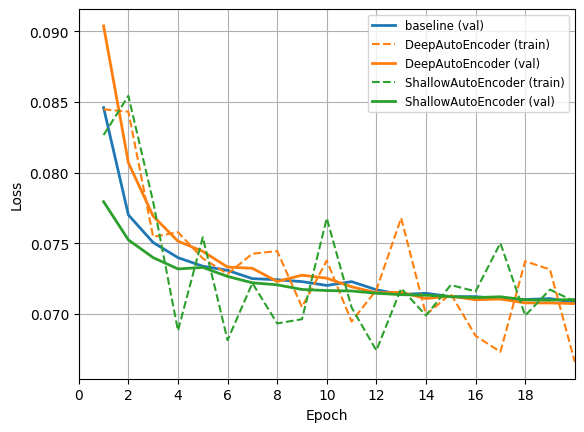

In [65]:
# plot baseeline validation loss
plot_experiment_history([base_loss], label_list = ['baseline'])

# plot training and validation losses for experiment 4 models
plot_experiment_history(
    loss_list=experiment_4_losses,
    label_list=['DeepAutoEncoder', 'ShallowAutoEncoder'],
    color=plt.get_cmap('tab10').colors[1:],
    to_plot_train=True,
)

# format plot
plt.xlim(1, base_num_epoch)
plt.xticks(range(0, base_num_epoch, 2))
plt.legend(fontsize='small')
plt.grid()

# save plot
plt.savefig("/content/CAE-MNIST/outputs/experiment_4_files/experiment_4_image_loss.png")
plt.show()

In [53]:
#manually add and push experiment 4 loss curve image to Git repository
!git -C /content/CAE-MNIST add outputs/experiment_4_files/experiment_4_image_loss.png
!git -C /content/CAE-MNIST commit -m "Add experiment 4 loss history curve"
!git -C /content/CAE-MNIST push origin main

[main a2a65dd] Add experiment 4 loss history curve
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 outputs/experiment_4_files/experiment_4_image_loss.png
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 58.76 KiB | 14.69 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   59f5121..a2a65dd  main -> main


### 4.2 🧪 Visual Benchmarks

In [54]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed images from experiment 4
experiment_4_reconstructions=get_experiment_reconstructions(experiment_4_models, sample_images, device)

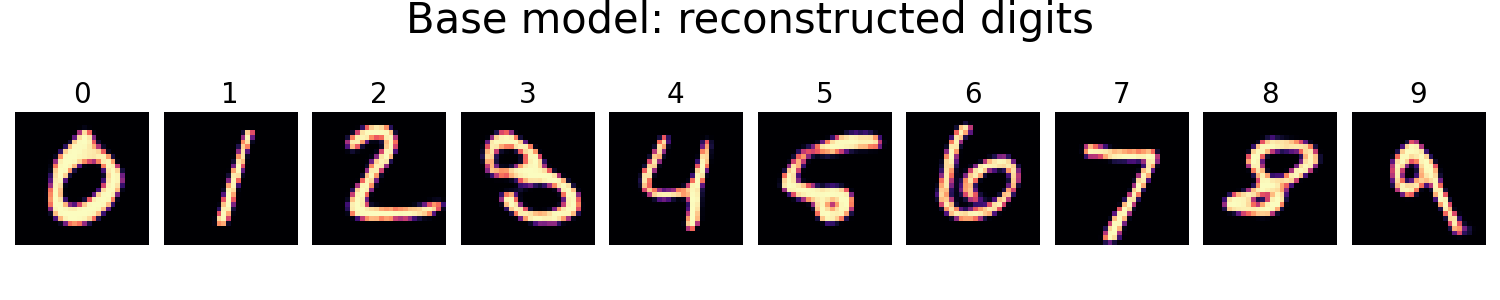

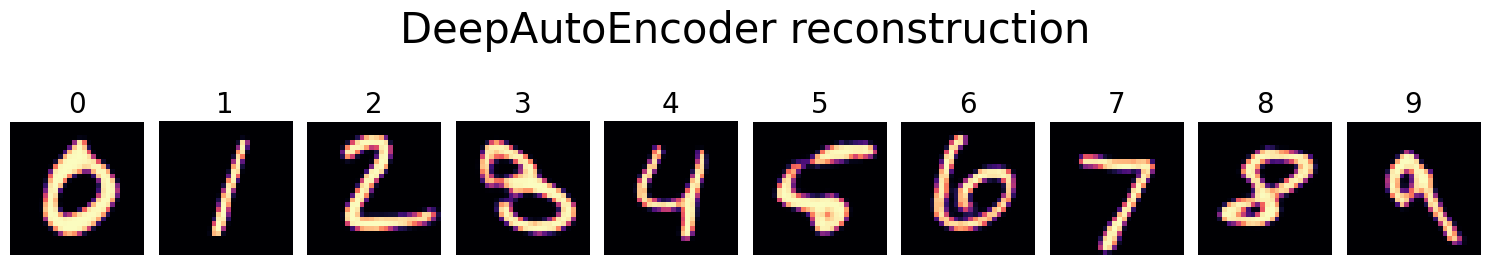

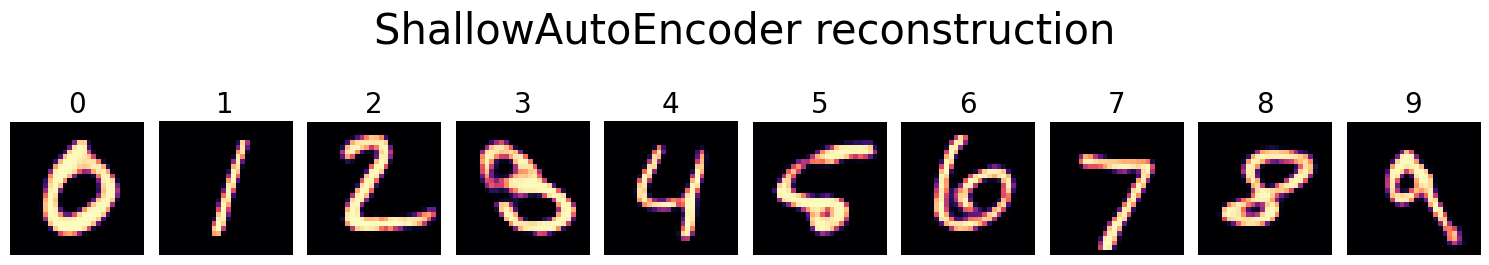

In [66]:
# display original benchmark images
display(Image(filename='/content/CAE-MNIST/outputs/base_model_files/base_image_reconstruction.png'))
print('\n')

# display reconstructions from experiment
experiment_4_reconstruction_figures = plot_experiment_reconstructions(
    experiment_4_reconstructions,
    sample_labels,
    title_list=['DeepAutoEncoder', 'ShallowAutoEncoder']
    )

for idx, fig in enumerate(experiment_4_reconstruction_figures):
  fig.savefig(f"/content/CAE-MNIST/outputs/experiment_4_files/experiment_4_image_reconstruction_{idx+1}.png")

In [58]:
#manually add and push experiment 1 reconstruction images to Git repository
for idx, _ in enumerate(experiment_4_reconstruction_figures):
  !git -C /content/CAE-MNIST add outputs/experiment_4_files/experiment_4_image_reconstruction_{idx+1}.png

!git -C /content/CAE-MNIST commit -m "Add experiment 4 reconstructed digits"
!git -C /content/CAE-MNIST push origin main

[main 235d87a] Add experiment 4 reconstructed digits
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 outputs/experiment_4_files/experiment_4_image_reconstruction_1.png
 create mode 100644 outputs/experiment_4_files/experiment_4_image_reconstruction_2.png
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 52.98 KiB | 17.66 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   a2a65dd..235d87a  main -> main


## 6. 📂 Export Experiment 4 Files

In [59]:
save_experiment_files(
    experiment_name="experiment_4",
    models=experiment_4_models,
    losses=experiment_4_losses,
    reconstructions=experiment_4_reconstructions,
    description_text=experiment_4_description
)

✅ Saved experiment_4 files to: /content/CAE_experiment_4_local


In [60]:
export_experiment_files(
    experiment_name="experiment_4",
    model_count=len(experiment_4_models)
)

✅ Exported experiment_4 files to: outputs/experiment_4_files/


## Import Experiment 4 Files

In [61]:
# Paths
outputs_path = '/content/CAE-MNIST/outputs/experiment_4_files'

# Storage lists
experiment_4_models = []
experiment_4_losses = []
experiment_4_reconstructions = []

# Load model weights, losses, and reconstructions
for idx, model in enumerate(experiment_4_model_classes):
    model_file = f'experiment_4_model_{idx+1}.pth'
    model_path = os.path.join(outputs_path, model_file)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    experiment_4_models.append(model)

    loss_file = f'experiment_4_loss_{idx+1}.pth'
    loss_path = os.path.join(outputs_path, loss_file)
    loss_history = torch.load(loss_path)
    experiment_4_losses.append(loss_history)

    reconstruction_file = f'experiment_4_reconstruction_{idx+1}.pth'
    reconstruction_path = os.path.join(outputs_path, reconstruction_file)
    reconstructed_images = torch.load(reconstruction_path)
    experiment_4_reconstructions.append(reconstructed_images)

# Load experiment description
with open(os.path.join(outputs_path, 'experiment_4_description.txt'), 'r') as f:
    experiment_4_description = f.read()

print("✅ All Experiment 4 models, losses, reconstructed images and description loaded.")

✅ All Experiment 4 models, losses, reconstructed images and description loaded.


## Re-Clone Git Repository

In [ ]:
!rm -rf /content/CAE-MNIST
!git clone {repo_url}